In [1]:
import sys, os
sys.path.append("../../../work2/ownutils/scriptssyn/") #update path accordingly
sys.path.append('./bin/')
import PolAB_A_allpars
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from basic import compute_synergy as compute_synergyb
import matplotlib.colors as colors

In [2]:
def compute_synergy(pars):
    mstars=[]
    for i in range(4):
        if i==0:
            A=0.0
            B=0.0
        elif i==1:
            A=2.0
            B=0.0
        elif i==2:
            A=0.0
            B=2.0
        else:
            A=1.0
            B=1.0
        m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([B]),A)
        mstars.append(m)
    SAB=np.log2(mstars[3]/mstars[1])
    SBA=np.log2(mstars[3]/mstars[2])
    if mstars[1]<mstars[2]: #due to accuracies when saving parameters, sometimes I do not recover exactly what was saved
        #print("wrong order", mstars[1],mstars[2])
        #sys.exit()
        #print("changing order")
        return None #[SBA,SAB]
    else:
        #print("Afirst")
        return [SAB,SBA]

Check one parameter set for Fig. 4.

In [3]:
k1_0 = 4.288
k2_0 = 11.023
k3_0 = 3.414
k4_0 = 10.362
kb = 180.19
#TF associated parameter values are as follows: pndd : 
k1_A = 120.985
k2_A = 154.358
k3_A = 4.561
k4_A = 2.854
k1_B = 5.007
k2_B = 25.685
k3_B = 15.086
k4_B = 2.083
#; pndi : k1,A = 6.317, k2,A = 517.659, k3,A = 1433.877, k4,A = 1.095, k1,B = 11.275, k2,B = 326.127, k3,B = 15.328, k4,B = 10.223; npii : k1,A = 4.844, k2,A = 6345.641, k3,A = 151.500, k4,A = 7.354, k1,B = 4.504, k2,B = 17.664, k3,B = 2601.429, k4,B = 3.088; npid : k1,A = 6.784, k2,A = 740.850, k3,A = 56.436, k4,A = 2.010, k1,B = 4.821, k2,B = 11.997, k3,B = 909.506, k4,B = 8.354; ppii : k1,A = 937.265, k2,A = 8084.904, k3,A = 5.392, k4,A = 1.982, k1,B = 9.945, k2,B = 18.372, k3,B = 2047.513, k4,B = 8.447

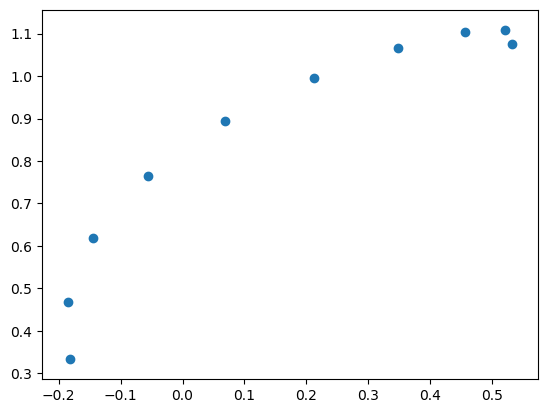

In [5]:
SABvals=[]
SBAvals=[]
for ku in np.logspace(2,4,10):
    parset=np.array([k2_0,k3_0,k4_0,k1_0,k2_A,k3_A,k4_A,k1_A,k2_B,k3_B,k4_B,k1_B,kb,ku,kb,ku,kb,ku,kb,ku,kb,ku,kb,ku])
    SAB,SBA=compute_synergy(parset)
    SABvals.append(SAB)
    SBAvals.append(SBA)

plt.scatter(SABvals,SBAvals)
plt.show()